In [31]:
#Importamos las librerias y el dataset
import pandas as pd
import numpy as np
import seaborn as sns

data_water = pd.read_csv("/content/drive/MyDrive/Coderhouse-DataScience2022/Entregables Coder/Dataset/water_potability.csv")

In [32]:
data_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [33]:
#Shape
print(data_water.shape)

(3276, 10)


In [34]:
# Tipos de datos
data_water.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [35]:
#Vemos si tenemos missings
data_water.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [36]:
data_water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Tratamiento de valores nulos**
Al ser una cantidad considerable, completo los valores nulos.

Verifico que si es conveniente usar la Media o la Mediana de cada variable para reemplazar los valores nulos.

In [37]:
df_ph = pd.DataFrame(data_water['ph'])
df_Sulfate = pd.DataFrame(data_water['Sulfate'])
df_Trihalomethanes = pd.DataFrame(data_water['Trihalomethanes'])
#ax = df_ph.plot.hist(figsize=(10, 8))
print('PH: ')
print('media: ',df_ph.mean(), ' Mediana: ', df_ph.median())
print()
print('Sulfate: ')
print('media: ',df_Sulfate.mean(), ' Mediana: ', df_Sulfate.median())
print()
print('Trihalomethanes: ')
print('media: ',df_Trihalomethanes.mean(), ' Mediana: ', df_Trihalomethanes.median())

PH: 
media:  ph    7.080795
dtype: float64  Mediana:  ph    7.036752
dtype: float64

Sulfate: 
media:  Sulfate    333.775777
dtype: float64  Mediana:  Sulfate    333.073546
dtype: float64

Trihalomethanes: 
media:  Trihalomethanes    66.396293
dtype: float64  Mediana:  Trihalomethanes    66.622485
dtype: float64


In [38]:
data_water["ph"].fillna(value = data_water["ph"].mean(), inplace = True)
data_water["Sulfate"].fillna(value = data_water["Sulfate"].mean(), inplace = True)
data_water["Trihalomethanes"].fillna(value = data_water["Trihalomethanes"].mean(), inplace = True)

In [39]:
print(data_water.shape)

(3276, 10)


In [40]:
#Separamos los datos de entrada de la salida
X = data_water.drop('Potability', axis=1) #Elimino de mi dataset la variable a predecir
y = data_water.Potability #Defino el Target

## **Experimento1: Probamos con test_size de 0,3 y max_depth=2**

In [41]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [42]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [43]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [44]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [45]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_1 = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_1 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_1)
print('% de aciertos sobre el set de evaluación:',test_accuracy_1)

% de aciertos sobre el set de entrenamiento: 0.6223288268643699
% de aciertos sobre el set de evaluación: 0.6378433367243134


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


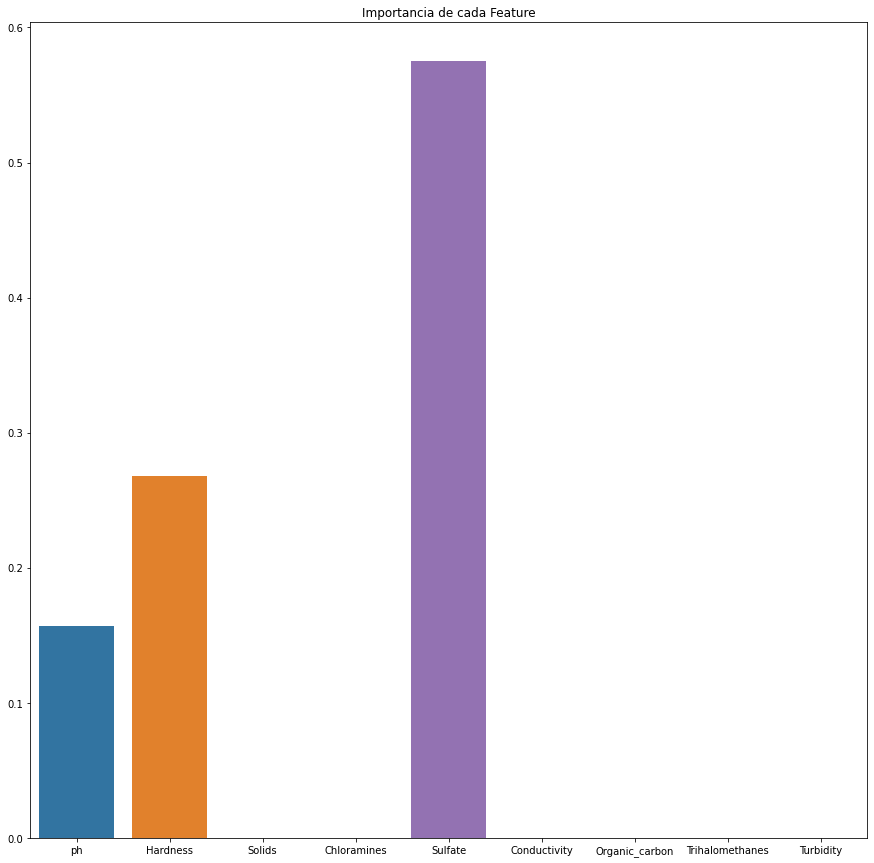

In [46]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## **Experimento2: Probamos con test_size de 0,3 y max_depth=3**

In [47]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [48]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=3, random_state = 42) #Creamos el modelo

In [49]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [51]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_2 = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_2 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_2)
print('% de aciertos sobre el set de evaluación:',test_accuracy_2)

% de aciertos sobre el set de entrenamiento: 0.6245093763628434
% de aciertos sobre el set de evaluación: 0.6388606307222787


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


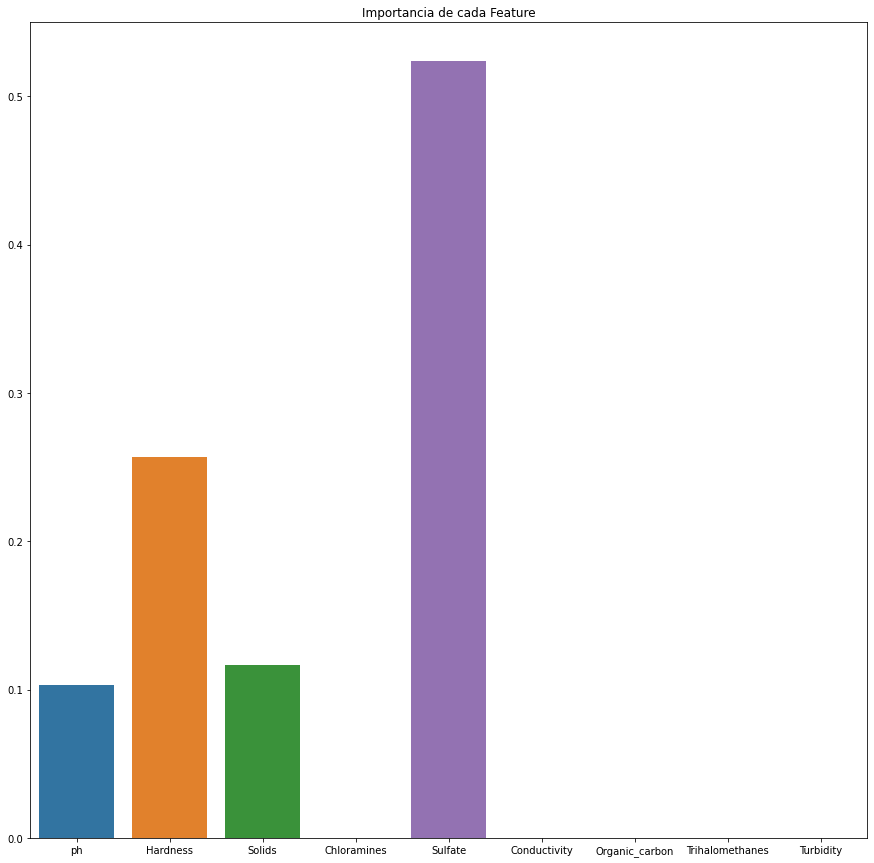

In [52]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## **Experimento3: Probamos con test_size de 0,3 y max_depth=4**

In [53]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [54]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=4, random_state = 42) #Creamos el modelo

In [55]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [56]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [57]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_3 = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_3 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_3)
print('% de aciertos sobre el set de evaluación:',test_accuracy_3)

% de aciertos sobre el set de entrenamiento: 0.639337112952464
% de aciertos sobre el set de evaluación: 0.6490335707019329


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


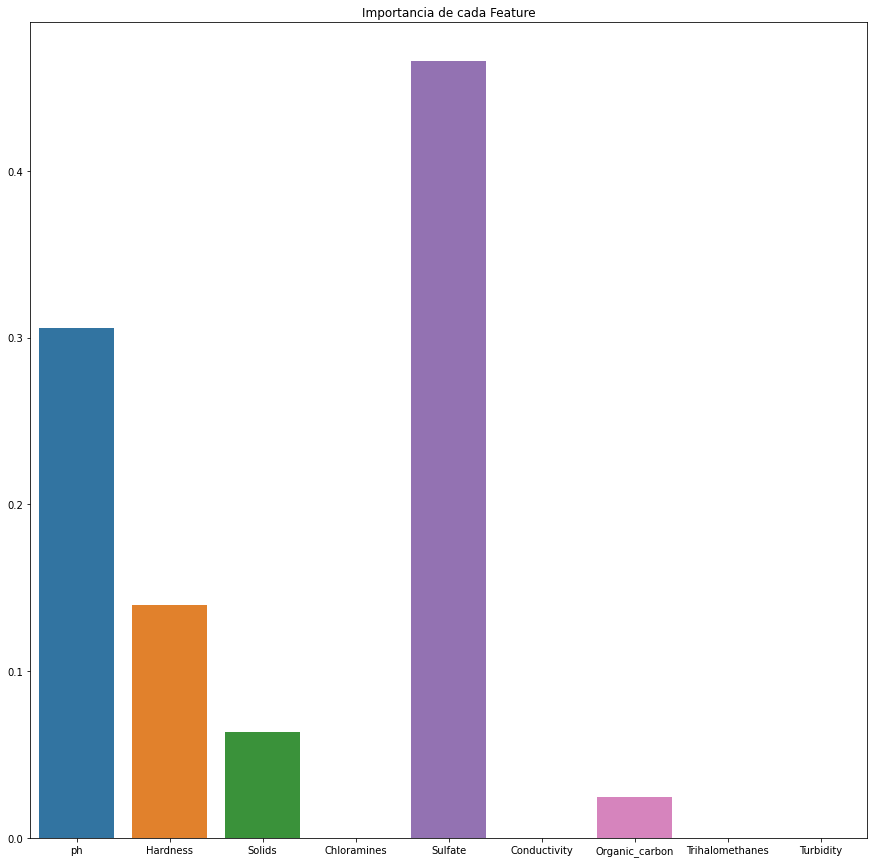

In [58]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

# Probamos con test_0,25

## **Experimento4: Probamos con test_size de 0,25 y max_depth=2**

In [59]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [60]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [61]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [62]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [63]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_4 = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_4 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_4)
print('% de aciertos sobre el set de evaluación:',test_accuracy_4)

% de aciertos sobre el set de entrenamiento: 0.6198616198616199
% de aciertos sobre el set de evaluación: 0.6324786324786325


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


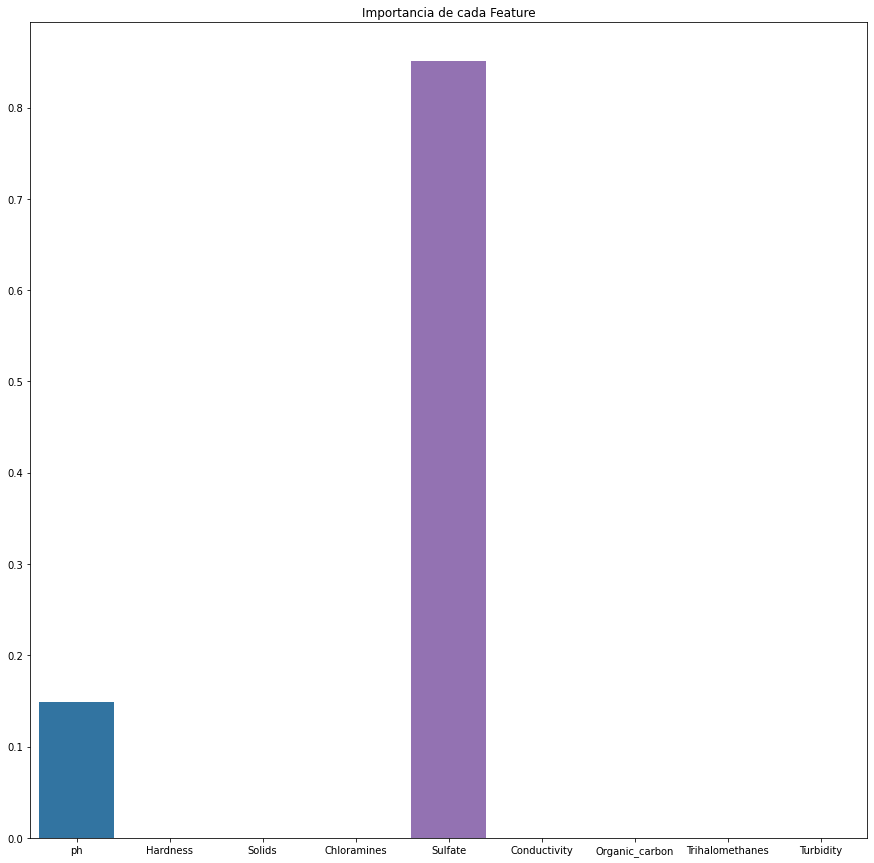

In [64]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## **Experimento5: Probamos con test_size de 0,25 y max_depth=3**

In [65]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [66]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=3, random_state = 42) #Creamos el modelo

In [67]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=3, random_state=42)

In [68]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [69]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_5 = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_5 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_5)
print('% de aciertos sobre el set de evaluación:',test_accuracy_5)

% de aciertos sobre el set de entrenamiento: 0.6422466422466423
% de aciertos sobre el set de evaluación: 0.63003663003663


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


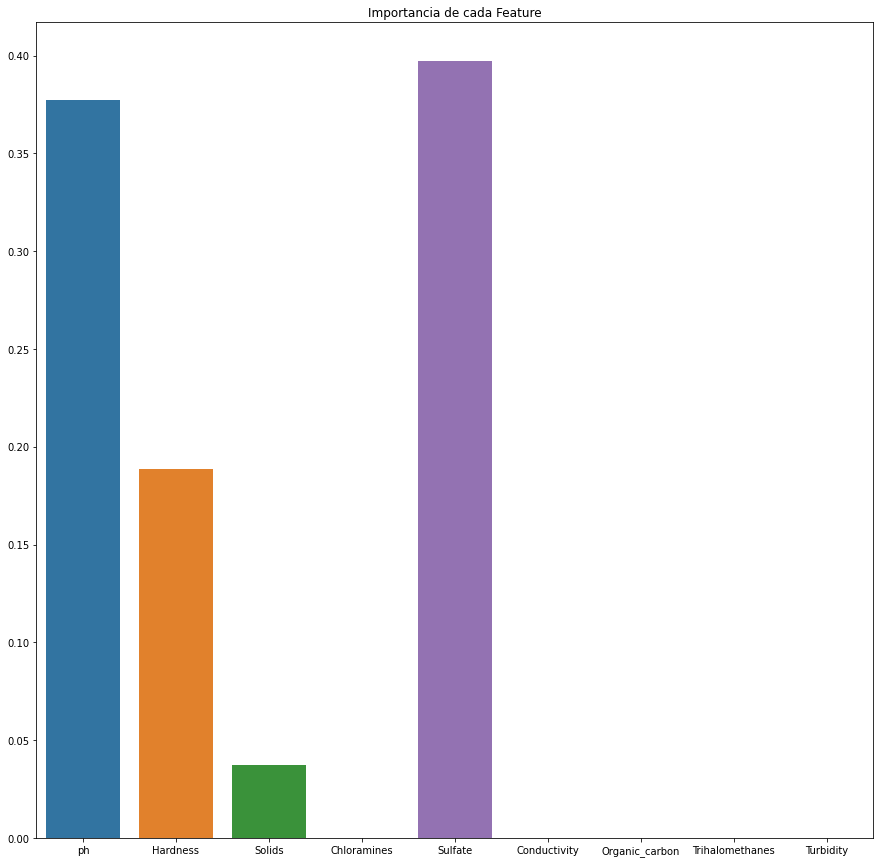

In [70]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## **Experimento6: Probamos con test_size de 0,25 y max_depth=4**

In [71]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [72]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=4, random_state = 42) #Creamos el modelo

In [73]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [74]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [75]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_6 = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_6 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_6)
print('% de aciertos sobre el set de evaluación:',test_accuracy_6)

% de aciertos sobre el set de entrenamiento: 0.64997964997965
% de aciertos sobre el set de evaluación: 0.6373626373626373


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


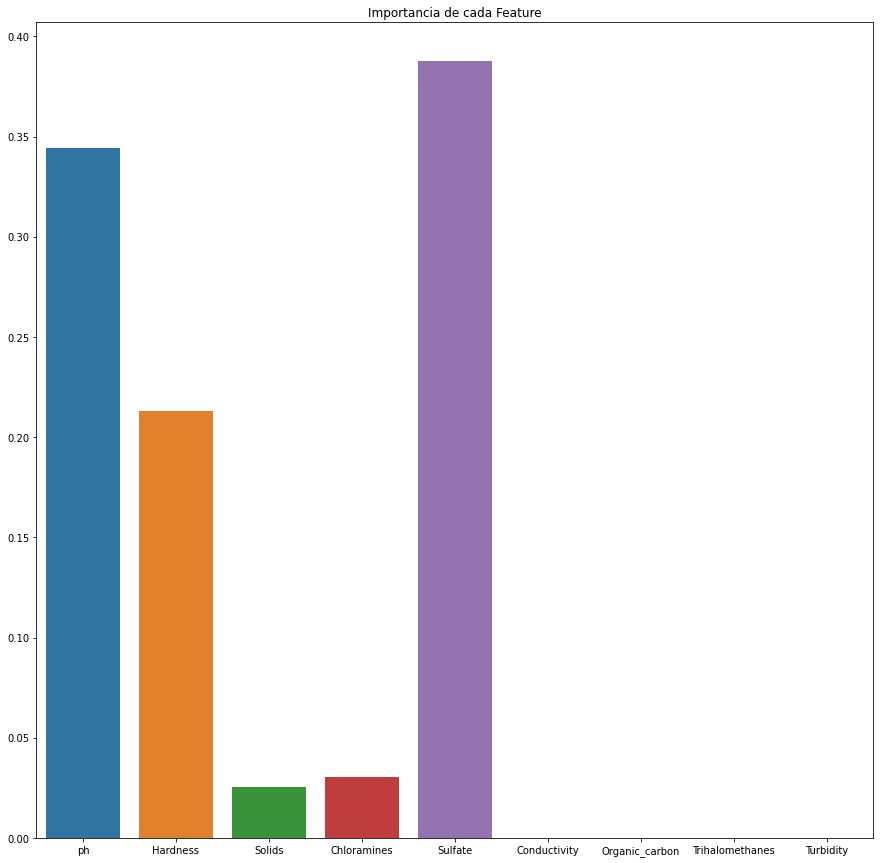

In [76]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

# **Comparativa de los resultados obtenidos**

In [77]:
tests_accuracy = [test_accuracy_1,test_accuracy_2,test_accuracy_3,test_accuracy_4,test_accuracy_5,test_accuracy_6]
trains_accuracy = [train_accuracy_1, train_accuracy_2, train_accuracy_3, train_accuracy_4, train_accuracy_5, train_accuracy_6]
nombres = ['exp_1','exp_2','exp_3','exp_4','exp_5','exp_6']
df_exp = pd.DataFrame(data=(trains_accuracy, tests_accuracy),columns=nombres)
df_exp = df_exp.T
df_exp.rename(columns={0:'train_accuracy',1:'test_accuracy'}, inplace=True)
df_exp['Experimento'] = [1,2,3,4,5,6]
df_exp

,train_accuracy,test_accuracy,Experimento
exp_1,0.622329,0.637843,1
exp_2,0.624509,0.638861,2
exp_3,0.639337,0.649034,3
exp_4,0.619862,0.632479,4
exp_5,0.642247,0.630037,5
exp_6,0.649980,0.637363,6


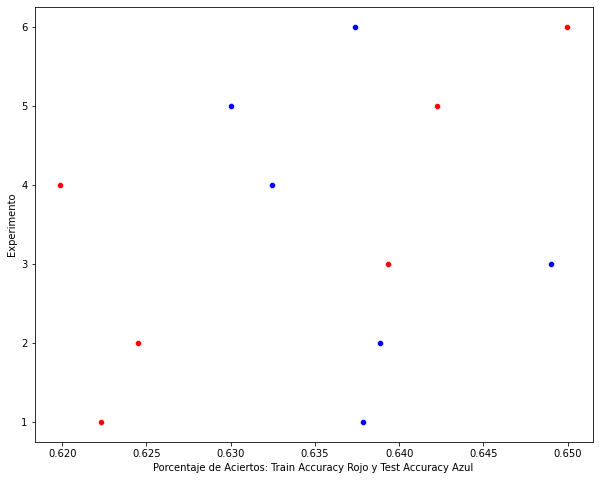

In [78]:
plt.figure(figsize = (10, 8))
markers = {"train_accuracy": "t", "test_accuracy": "x"}
sns.scatterplot(data=df_exp, x='train_accuracy', y='Experimento', color='red')
sns.scatterplot(data=df_exp, x='test_accuracy', y='Experimento', color='blue',)
sns.set_palette("Reds")
plt.xlabel('Porcentaje de Aciertos: Train Accuracy Rojo y Test Accuracy Azul')
#set(title='Salario en USD segun Pais de Residencia del empleado, discriminado por Nivel de Experiencia y Remote Ratio', xlabel='Salario en USD', ylabel='Pais de Residencia de los Empleados')
plt.show()

## **Conclusión:** El modelo que mejor predice es el N° 3. Realizado con **test_size de 0,3** y **max_depth de 4**. Dando un resultado de 63,9% de aciertos sobre el set de entrenamiento y un 64,9% de aciertos sobre el set de evaluación. 